In [1]:
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
lung_seg_path = os.path.join("..", "data", "processed","Lung Segmentation Data")

In [3]:
def load_images(folder_path, num_images, final_folder):
    '''Cette fonction permet de charger les images qui seront utilisées pour le modèle LeNet.
    folder_path est le chemin vers le dossier contenant l'ensemble des images (qui contient normalement 3 sous-dossiers)
    num_images est le nombre d'images que l'on souhaite importer par sous dossier
    final_folder est le dossier final dans lequel les images sont contenues : "images" pour les données brutes, "lung_masks" pour les masques...'''

    images = []
    labels = []

    for subfolder in os.listdir(folder_path): # Je parcours les sous-dossiers (Covid, Non-covid, Normal)
        subfolder_path = os.path.join(folder_path, subfolder, final_folder) # Les images se situent encore dans un sous dossier

        for image in tqdm(os.listdir(subfolder_path)[:num_images]):
            image_path = os.path.join(subfolder_path, image)
            img = cv2.imread(image_path,  cv2.IMREAD_GRAYSCALE)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(subfolder)
    
    return images, labels

In [4]:
image, label = load_images(lung_seg_path, 1000, "images") # Images brutes

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 738.01it/s]


In [5]:
image_norm, label_norm = load_images(lung_seg_path, 1000, "MinMaxNormalized images")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 406.79it/s]


In [6]:
image_norm_hist, label_norm_hist = load_images(lung_seg_path, 1000, "HistEgalNormalized images")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:03<00:00, 268.17it/s]


In [7]:
image_norm_CLAHE, label_norm_CLAHE = load_images(lung_seg_path, 1000, "CLAHE images")

100%|██████████| 1000/1000 [00:01<00:00, 798.72it/s]


In [8]:
# Transformation des labels pour ne plus avoir des strings
label_encoder = LabelEncoder()
targets_encoded = label_encoder.fit_transform(label) #COVID-19 =0, Non_COVID =1, Normal =2
targets_encoded.shape

(3000,)

In [9]:
# Transformation des labels pour ne plus avoir des strings (Images normalisées MinMax)
label_encoder_norm = LabelEncoder()
targets_encoded_norm = label_encoder_norm.fit_transform(label_norm) #COVID-19 =0, Non_COVID =1, Normal =2
targets_encoded_norm.shape

(3000,)

In [10]:
# Transformation des labels pour ne plus avoir des strings (Images normalisées HistEgal)
label_encoder_norm_hist = LabelEncoder()
targets_encoded_norm_hist = label_encoder_norm_hist.fit_transform(label_norm_hist) #COVID-19 =0, Non_COVID =1, Normal =2
targets_encoded_norm_hist.shape

(3000,)

In [11]:
# Transformation des labels pour ne plus avoir des strings (Images normalisées CLAHE)
label_encoder_norm_CLAHE = LabelEncoder()
targets_encoded_norm_CLAHE = label_encoder_norm_CLAHE.fit_transform(label_norm_CLAHE) #COVID-19 =0, Non_COVID =1, Normal =2
targets_encoded_norm_CLAHE.shape

(3000,)

In [12]:
# Transformation de la liste d'images en tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur)
images_encoded = np.stack(image)
images_encoded = images_encoded.reshape((-1, 256, 256, 1))
images_encoded.shape

(3000, 256, 256, 1)

In [13]:
# Transformation de la liste d'images en tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur) (Images normalisées)
images_encoded_norm = np.stack(image_norm)
images_encoded_norm = images_encoded_norm.reshape((-1, 256, 256, 1))
images_encoded_norm.shape

(3000, 256, 256, 1)

In [14]:
# Transformation de la liste d'images en tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur) (Images normalisées HistEgal)
images_encoded_norm_hist = np.stack(image_norm_hist)
images_encoded_norm_hist = images_encoded_norm_hist.reshape((-1, 256, 256, 1))
images_encoded_norm_hist.shape

(3000, 256, 256, 1)

In [15]:
# Transformation de la liste d'images en tableau à 4 dimensions (nb_images, largeur, hauteur, profondeur) (Images normalisées CLAHE)
images_encoded_norm_CLAHE = np.stack(image_norm_CLAHE)
images_encoded_norm_CLAHE = images_encoded_norm_CLAHE.reshape((-1, 256, 256, 1))
images_encoded_norm_CLAHE.shape

(3000, 256, 256, 1)

In [16]:
# Séparation des données en ensembles de test et train
X_train, X_test, y_train, y_test = train_test_split(images_encoded, targets_encoded, test_size=0.2, random_state=42)

# Séparation des données en ensembles de test et train (Images normalisées)
X_norm_train, X_norm_test, y_norm_train, y_norm_test = train_test_split(images_encoded_norm, targets_encoded_norm, test_size=0.2, random_state=42)

# Séparation des données en ensembles de test et train (Images normalisées HistEgal)
X_norm_hist_train, X_norm_hist_test, y_norm_hist_train, y_norm_hist_test = train_test_split(images_encoded_norm_hist, targets_encoded_norm_hist, test_size=0.2, random_state=42)

# Séparation des données en ensembles de test et train (Images normalisées CLAHE)
X_norm_CLAHE_train, X_norm_CLAHE_test, y_norm_CLAHE_train, y_norm_CLAHE_test = train_test_split(images_encoded_norm_CLAHE, targets_encoded_norm_CLAHE, test_size=0.2, random_state=42)

In [17]:
from keras.utils import to_categorical

In [18]:
# Labels en vecteurs catégoriels binaires
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Données de X comprises entre 0 et 1
X_train = X_train / 255
X_test = X_test / 255

# Labels en vecteurs catégoriels binaires (Images normalisées)
y_norm_train = to_categorical(y_norm_train)
y_norm_test = to_categorical(y_norm_test)

# Données de X comprises entre 0 et 1 (Images normalisées)
X_norm_train = X_norm_train / 255
X_norm_test = X_norm_test / 255

# Labels en vecteurs catégoriels binaires (Images normalisées HistEgal)
y_norm_hist_train = to_categorical(y_norm_hist_train)
y_norm_hist_test = to_categorical(y_norm_hist_test)

# Données de X comprises entre 0 et 1 (Images normalisées HistEgal)
X_norm_hist_train = X_norm_hist_train / 255
X_norm_hist_test = X_norm_hist_test / 255

# Labels en vecteurs catégoriels binaires (Images normalisées HistEgal)
y_norm_CLAHE_train = to_categorical(y_norm_CLAHE_train)
y_norm_CLAHE_test = to_categorical(y_norm_CLAHE_test)

# Données de X comprises entre 0 et 1 (Images normalisées HistEgal)
X_norm_CLAHE_train = X_norm_CLAHE_train / 255
X_norm_CLAHE_test = X_norm_CLAHE_test / 255

In [19]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [20]:
# Architecture du modèle
inputs=Input(shape = (256, 256,1), name = "Input")


conv_1 = Conv2D(filters = 30,                    # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 1),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 3,
                activation = 'softmax')
x=conv_1(inputs)
x=max_pool_1(x)
x=conv_2(x)
x=max_pool_2(x)


x=dropout(x)
x=flatten(x)
x=dense_1(x)
outputs=dense_2(x)

d:\Nico\Code\MAR24_BDS_Radios_Pulmonaire\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
lenet = Model(inputs = inputs, outputs = outputs) # Images brutes

# Compilation
lenet.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

training_history_lenet = lenet.fit(X_train, y_train,          # données
                                   validation_split = 0.2,    # split de test
                                   epochs = 20,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - accuracy: 0.3972 - loss: 1.2553 - val_accuracy: 0.7312 - val_loss: 0.7387
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7555 - loss: 0.6675 - val_accuracy: 0.7625 - val_loss: 0.5621
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8108 - loss: 0.5168 - val_accuracy: 0.7708 - val_loss: 0.5610
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7958 - loss: 0.5512 - val_accuracy: 0.8438 - val_loss: 0.4081
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8678 - loss: 0.4042 - val_accuracy: 0.8479 - val_loss: 0.3869
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8788 - loss: 0.3797 - val_accuracy: 0.8438 - val_loss: 0.3921
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8934 - loss: 0.3425 - val_accuracy: 0.8562 - val_loss: 0.3781
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9033 - loss: 0.2956 - val_accuracy: 0.8417 - val_loss:

In [22]:
all_val_accuracy=[]
train_acc_lenet = training_history_lenet.history['accuracy']
all_val_accuracy.append(training_history_lenet.history['val_accuracy'])


# Results
test_pred_lenet = lenet.predict(X_test)
test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class, test_pred_lenet_class))
pd.crosstab(y_test_class, test_pred_lenet_class)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       217
           1       0.88      0.91      0.89       197
           2       0.87      0.80      0.83       186

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



col_0,0,1,2
row_0,,,
0,189,14,14
1,9,179,9
2,26,11,149


In [23]:
lenet_norm = Model(inputs = inputs, outputs = outputs) # Images normalisées MinMax

# Compilation
lenet_norm.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

training_history_lenet_norm = lenet_norm.fit(X_norm_train, y_norm_train,          # données
                                   validation_split = 0.2,    # split de test
                                   epochs = 20,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.7833 - loss: 1.0303 - val_accuracy: 0.7812 - val_loss: 0.5975
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8443 - loss: 0.4365 - val_accuracy: 0.8229 - val_loss: 0.5081
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8837 - loss: 0.3654 - val_accuracy: 0.8438 - val_loss: 0.4601
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9051 - loss: 0.2967 - val_accuracy: 0.8396 - val_loss: 0.4531
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9122 - loss: 0.2597 - val_accuracy: 0.8333 - val_loss: 0.4355
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9261 - loss: 0.2211 - val_accuracy: 0.8333 - val_loss: 0.4468
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9206 - loss: 0.2192 - val_accuracy: 0.8604 - val_loss: 0.4321
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9464 - loss: 0.1862 - val_accuracy: 0.8396 - val_loss:

In [24]:
all_val_accuracy_norm=[]
train_acc_lenet_norm = training_history_lenet_norm.history['accuracy']
all_val_accuracy_norm.append(training_history_lenet_norm.history['val_accuracy'])


# Results
test_pred_lenet_norm = lenet_norm.predict(X_norm_test)
test_pred_lenet_class_norm = test_pred_lenet_norm.argmax(axis = 1)
y_test_class_norm = y_norm_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class_norm, test_pred_lenet_class_norm))
pd.crosstab(y_test_class_norm, test_pred_lenet_class_norm)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       217
           1       0.90      0.91      0.91       197
           2       0.80      0.88      0.83       186

    accuracy                           0.86       600
   macro avg       0.86      0.87      0.86       600
weighted avg       0.87      0.86      0.86       600



col_0,0,1,2
row_0,,,
0,175,11,31
1,6,180,11
2,15,8,163


In [25]:
lenet_norm_hist = Model(inputs = inputs, outputs = outputs) # Images normalisées MinMax

# Compilation
lenet_norm_hist.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

training_history_lenet_norm_hist = lenet_norm_hist.fit(X_norm_hist_train, y_norm_hist_train,          # données
                                   validation_split = 0.2,    # split de test
                                   epochs = 20,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8134 - loss: 1.2380 - val_accuracy: 0.7771 - val_loss: 0.7592
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.8622 - loss: 0.3274 - val_accuracy: 0.8667 - val_loss: 0.5480
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9442 - loss: 0.1769 - val_accuracy: 0.8562 - val_loss: 0.5875
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9655 - loss: 0.1030 - val_accuracy: 0.8521 - val_loss: 0.6224
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9740 - loss: 0.0715 - val_accuracy: 0.8479 - val_loss: 0.6607
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9871 - loss: 0.0546 - val_accuracy: 0.8479 - val_loss: 0.7050
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9925 - loss: 0.0433 - val_accuracy: 0.8458 - val_loss: 0.7270
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9930 - loss: 0.0359 - val_accuracy: 0.8500 - val_loss:

In [26]:
all_val_accuracy_norm_hist=[]
train_acc_lenet_norm_hist = training_history_lenet_norm_hist.history['accuracy']
all_val_accuracy_norm_hist.append(training_history_lenet_norm_hist.history['val_accuracy'])


# Results
test_pred_lenet_norm_hist = lenet_norm_hist.predict(X_norm_hist_test)
test_pred_lenet_class_norm_hist = test_pred_lenet_norm_hist.argmax(axis = 1)
y_test_class_norm_hist = y_norm_hist_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class_norm_hist, test_pred_lenet_class_norm_hist))
pd.crosstab(y_test_class_norm_hist, test_pred_lenet_class_norm_hist)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       217
           1       0.87      0.89      0.88       197
           2       0.81      0.74      0.77       186

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600



col_0,0,1,2
row_0,,,
0,182,12,23
1,12,175,10
2,35,14,137


In [28]:
lenet_norm_CLAHE = Model(inputs = inputs, outputs = outputs) # Images normalisées MinMax

# Compilation
lenet_norm_CLAHE.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

training_history_lenet_norm_CLAHE = lenet_norm_CLAHE.fit(X_norm_CLAHE_train, y_norm_CLAHE_train,          # données
                                   validation_split = 0.2,    # split de test
                                   epochs = 20,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8474 - loss: 0.5437 - val_accuracy: 0.8167 - val_loss: 0.4879
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9494 - loss: 0.1682 - val_accuracy: 0.8375 - val_loss: 0.5394
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9683 - loss: 0.0828 - val_accuracy: 0.8333 - val_loss: 0.6796
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9838 - loss: 0.0470 - val_accuracy: 0.8438 - val_loss: 0.7173
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9925 - loss: 0.0220 - val_accuracy: 0.8479 - val_loss: 0.7599
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9973 - loss: 0.0142 - val_accuracy: 0.8354 - val_loss: 0.8191
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9986 - loss: 0.0101 - val_accuracy: 0.8500 - val_loss: 0.7824
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.8521 - val_loss:

In [29]:
all_val_accuracy_norm_CLAHE=[]
train_acc_lenet_norm_CLAHE = training_history_lenet_norm_CLAHE.history['accuracy']
all_val_accuracy_norm_CLAHE.append(training_history_lenet_norm_CLAHE.history['val_accuracy'])


# Results
test_pred_lenet_norm_CLAHE = lenet_norm_CLAHE.predict(X_norm_CLAHE_test)
test_pred_lenet_class_norm_CLAHE = test_pred_lenet_norm_CLAHE.argmax(axis = 1)
y_test_class_norm_CLAHE = y_norm_CLAHE_test.argmax(axis = 1)

print(metrics.classification_report(y_test_class_norm_CLAHE, test_pred_lenet_class_norm_CLAHE))
pd.crosstab(y_test_class_norm_CLAHE, test_pred_lenet_class_norm_CLAHE)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       217
           1       0.87      0.88      0.88       197
           2       0.82      0.80      0.81       186

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



col_0,0,1,2
row_0,,,
0,179,16,22
1,12,174,11
2,28,9,149


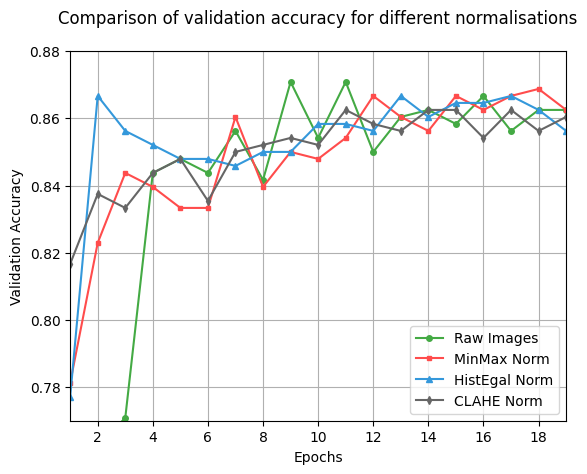

In [49]:
# Graphes combinés de l'ensemble des modèles
pastel_colors = {
    'LeNet Raw': '#44AA44',     # green
    'LeNet MinMax': '#FF4C4C',  # red
    'LeNet HistEgal': '#3498DB',# blue
    'LeNet CLAHE': '#666666'    # gray
}

plt.title('Comparison of validation accuracy for different normalisations', pad = 20)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(np.arange(1 , 21, 1),
         all_val_accuracy[0], 
         label = 'Raw Images', marker='o',
         linestyle='-', markersize=4,
         color=pastel_colors['LeNet Raw'])
plt.plot(np.arange(1 , 21, 1),
         all_val_accuracy_norm[0], 
         label = 'MinMax Norm', marker='s',
         linestyle='-', markersize=3,
         color=pastel_colors['LeNet MinMax'])        
plt.plot(np.arange(1 , 21, 1),
         all_val_accuracy_norm_hist[0], 
         label = 'HistEgal Norm', marker='^',
         linestyle='-', markersize=4,
         color=pastel_colors['LeNet HistEgal'])
plt.plot(np.arange(1 , 21, 1),
         all_val_accuracy_norm_CLAHE[0], 
         label = 'CLAHE Norm', marker='d',
         linestyle='-', markersize=4,
         color=pastel_colors['LeNet CLAHE'])
plt.xlim([1, 19])
plt.ylim([0.77, 0.88])
plt.grid(True)
plt.legend()
plt.show()